### Import libraries

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sq3

### Import data

In [299]:
df = pd.read_csv('housing.csv')

In [300]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18060,-122.02,37.26,34.0,1764.0,243.0,692.0,223.0,8.0331,500001.0,<1H OCEAN
5283,-118.46,34.06,20.0,5448.0,1532.0,2202.0,1442.0,4.2554,500001.0,<1H OCEAN
16987,-122.26,37.55,17.0,1321.0,425.0,683.0,408.0,4.7045,500001.0,NEAR BAY
18728,-122.37,40.55,26.0,1435.0,234.0,544.0,232.0,2.6705,136700.0,INLAND
15764,-122.43,37.77,52.0,2416.0,620.0,1188.0,591.0,2.3887,337500.0,NEAR BAY


### First inspection

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Inspect and delete NaN values

In [302]:
df[df.total_bedrooms.isna()].sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4600,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
2115,-119.72,36.76,23.0,6403.0,NaN,3573.0,1260.0,2.3006,69000.0,INLAND
3529,-118.53,34.26,18.0,3674.0,NaN,1590.0,550.0,8.1760,308400.0,<1H OCEAN
17639,-121.90,37.28,26.0,3756.0,NaN,1408.0,535.0,5.6427,320000.0,<1H OCEAN
3721,-118.43,34.20,28.0,3386.0,NaN,2240.0,737.0,3.0221,290100.0,<1H OCEAN
14986,-117.03,32.73,34.0,2061.0,NaN,1169.0,400.0,3.5096,142000.0,NEAR OCEAN
20069,-120.37,38.01,30.0,473.0,NaN,242.0,93.0,2.5417,123200.0,INLAND
5678,-118.30,33.72,35.0,2790.0,NaN,1167.0,441.0,6.2028,361500.0,NEAR OCEAN
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND
2028,-119.75,36.71,38.0,1481.0,NaN,1543.0,372.0,1.4577,49800.0,INLAND


In [303]:
df.dropna(inplace = True)

### Check for duplicate values

In [304]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


### Summary statistics

In [305]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Analyse 'ocen_proximity' column

In [306]:
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

### Analyse the distribution of data

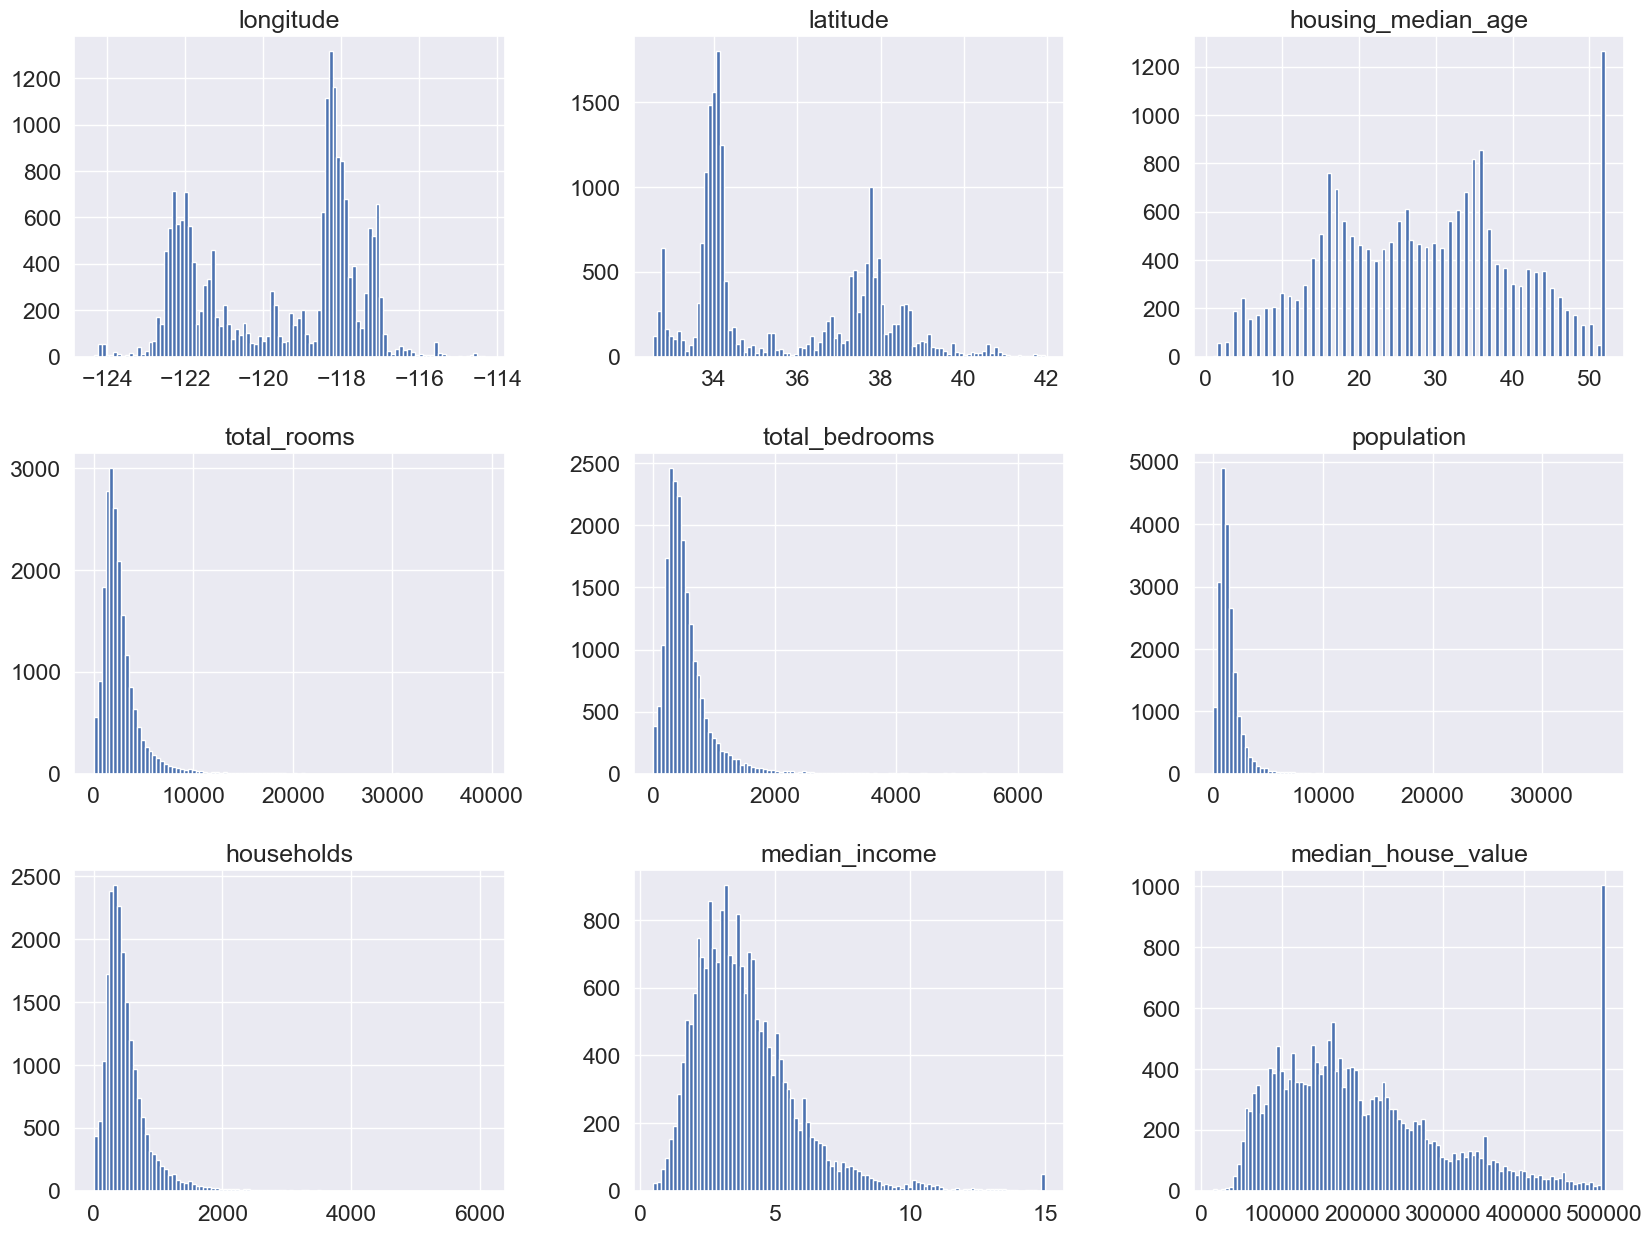

In [307]:
df.hist(bins=100, figsize=(20,15))
plt.show()

### Add column 'rooms_per_household'
* Total rooms / Households = Rooms per Household

In [308]:
df["rooms_per_household"] = df.total_rooms.div(df.households)

In [309]:
df.rooms_per_household.nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [310]:
df.rooms_per_household.nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

### Add column 'pop_per_household'
* Population / Households = Population per Household

In [311]:
df['pop_per_household'] = df.population.div(df.households)

In [312]:
df.pop_per_household.nlargest(10)

19006    1243.333333
3364      599.714286
16669     502.461538
13034     230.172414
9172       83.171429
12104      63.750000
16420      51.400000
8874       41.214286
13366      33.952941
5986       21.333333
Name: pop_per_household, dtype: float64

In [313]:
df.pop_per_household.nsmallest(10)

11849    0.692308
5342     0.750000
19522    0.970588
19427    1.060606
4623     1.066176
4557     1.089268
8432     1.089286
2901     1.161290
11534    1.169329
14039    1.215873
Name: pop_per_household, dtype: float64

### Add column 'bedrooms_per_room'
* Total bedrooms / Total rooms = Bedrooms per Room

In [314]:
df['bedrooms_per_room'] = df.total_bedrooms.div(df.total_rooms)

In [315]:
df.bedrooms_per_room.nlargest(10)

3126     1.000000
5916     1.000000
19435    1.000000
17820    0.923077
4552     0.922414
4559     0.896552
4550     0.780347
2779     0.750000
16186    0.738318
12484    0.711775
Name: bedrooms_per_room, dtype: float64

In [316]:
df.bedrooms_per_room.nsmallest(10)

1566     0.100000
5538     0.100000
13606    0.100000
18504    0.100000
4626     0.104712
8847     0.105361
5291     0.105790
15698    0.106785
8852     0.108164
6727     0.109047
Name: bedrooms_per_room, dtype: float64

### Summary statistics of new columns

In [317]:
df[['rooms_per_household', 'pop_per_household', 'bedrooms_per_room']].describe()

,rooms_per_household,pop_per_household,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000
mean,5.431344,3.071533,0.213039
std,2.482946,10.438269,0.057983
min,0.846154,0.692308,0.100000
25%,4.441441,2.429032,0.175427
50%,5.230769,2.817582,0.203162
75%,6.052381,3.281513,0.239821
max,141.909091,1243.333333,1.000000


### Visualize the median house values

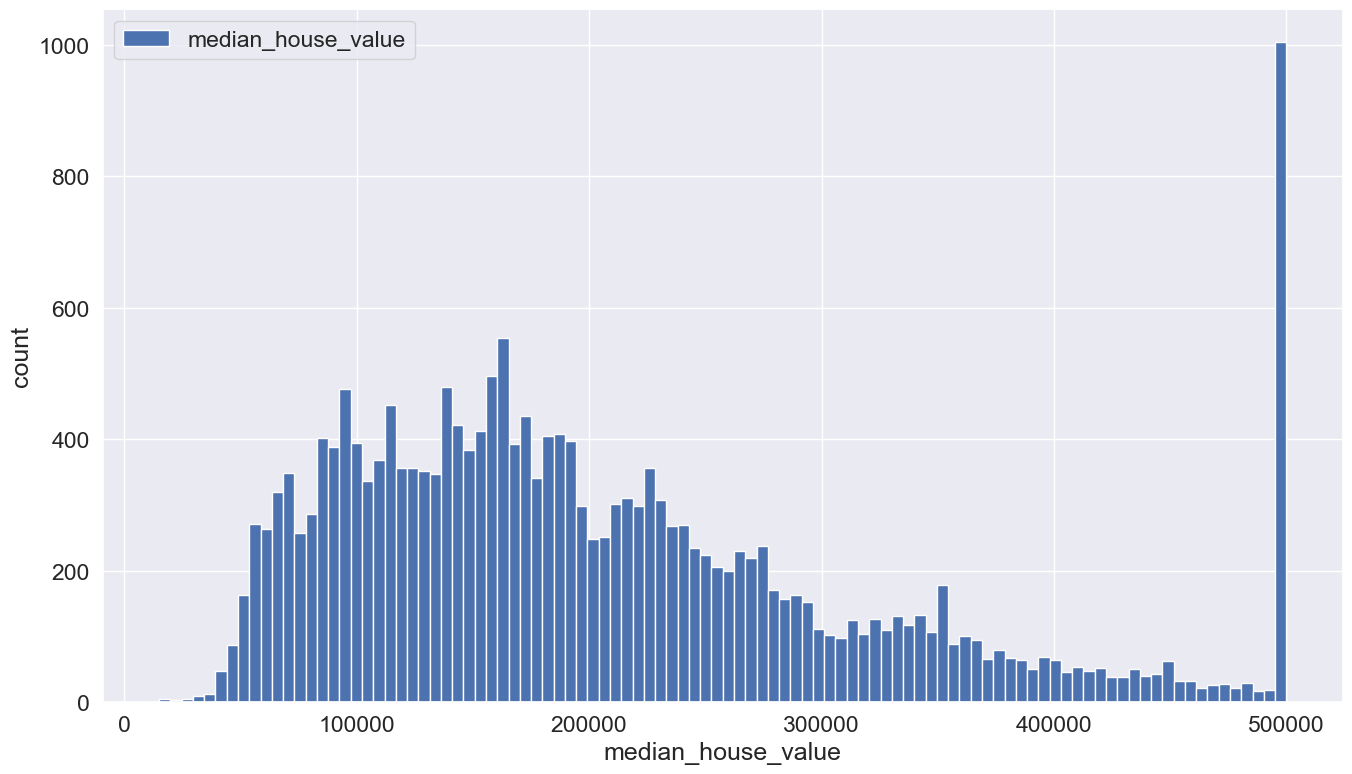

In [318]:
df.median_house_value.hist(bins = 100, figsize = (16, 9), legend = True)
plt.xlabel("median_house_value")
plt.ylabel("count")
plt.show()

### Check the correlation of median house values to other columns

In [319]:
df.corr().median_house_value.sort_values(ascending = False)

median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
pop_per_household     -0.023639
population            -0.025300
longitude             -0.045398
latitude              -0.144638
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

### Visualize the median incomes

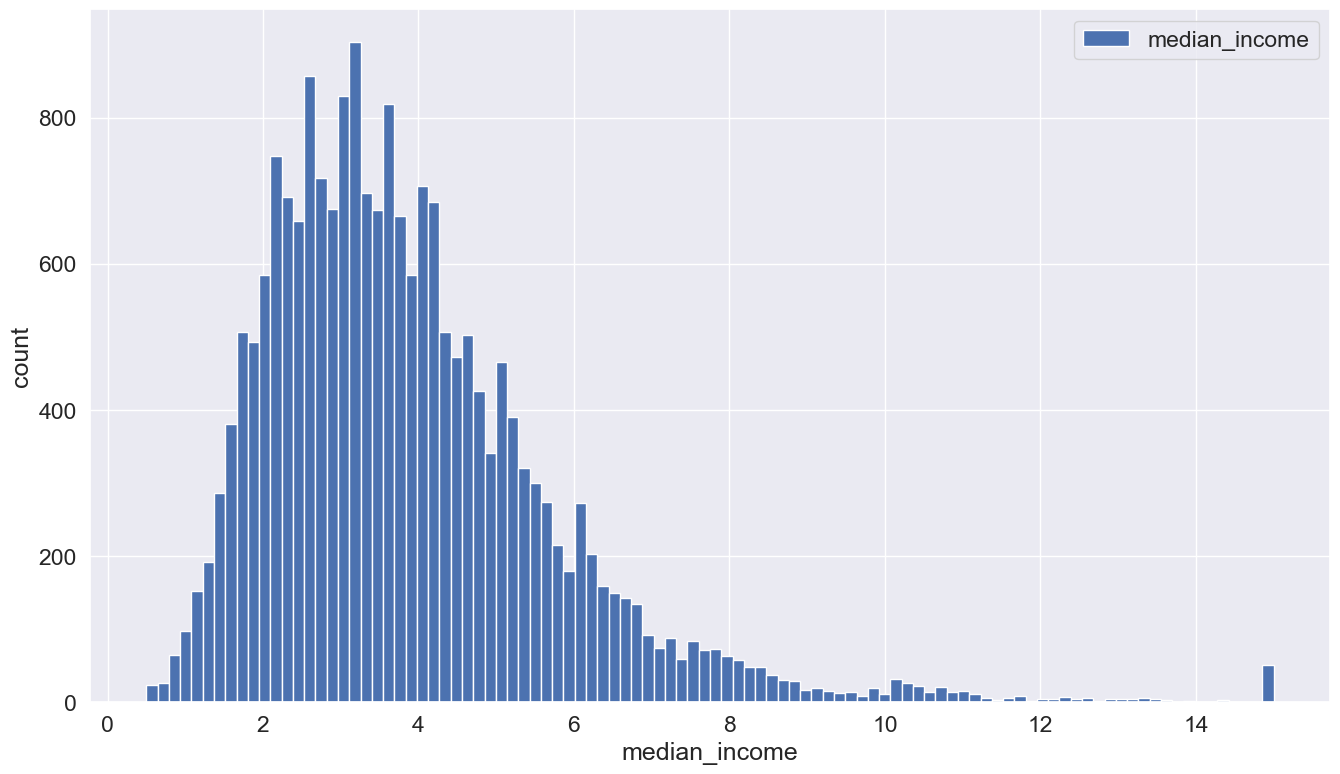

In [320]:
df.median_income.hist(bins = 100, figsize = (16, 9), legend = True)
plt.xlabel("median_income")
plt.ylabel("count")
plt.show()

### Visualize median income and median house values with bivariate and univariate graphs

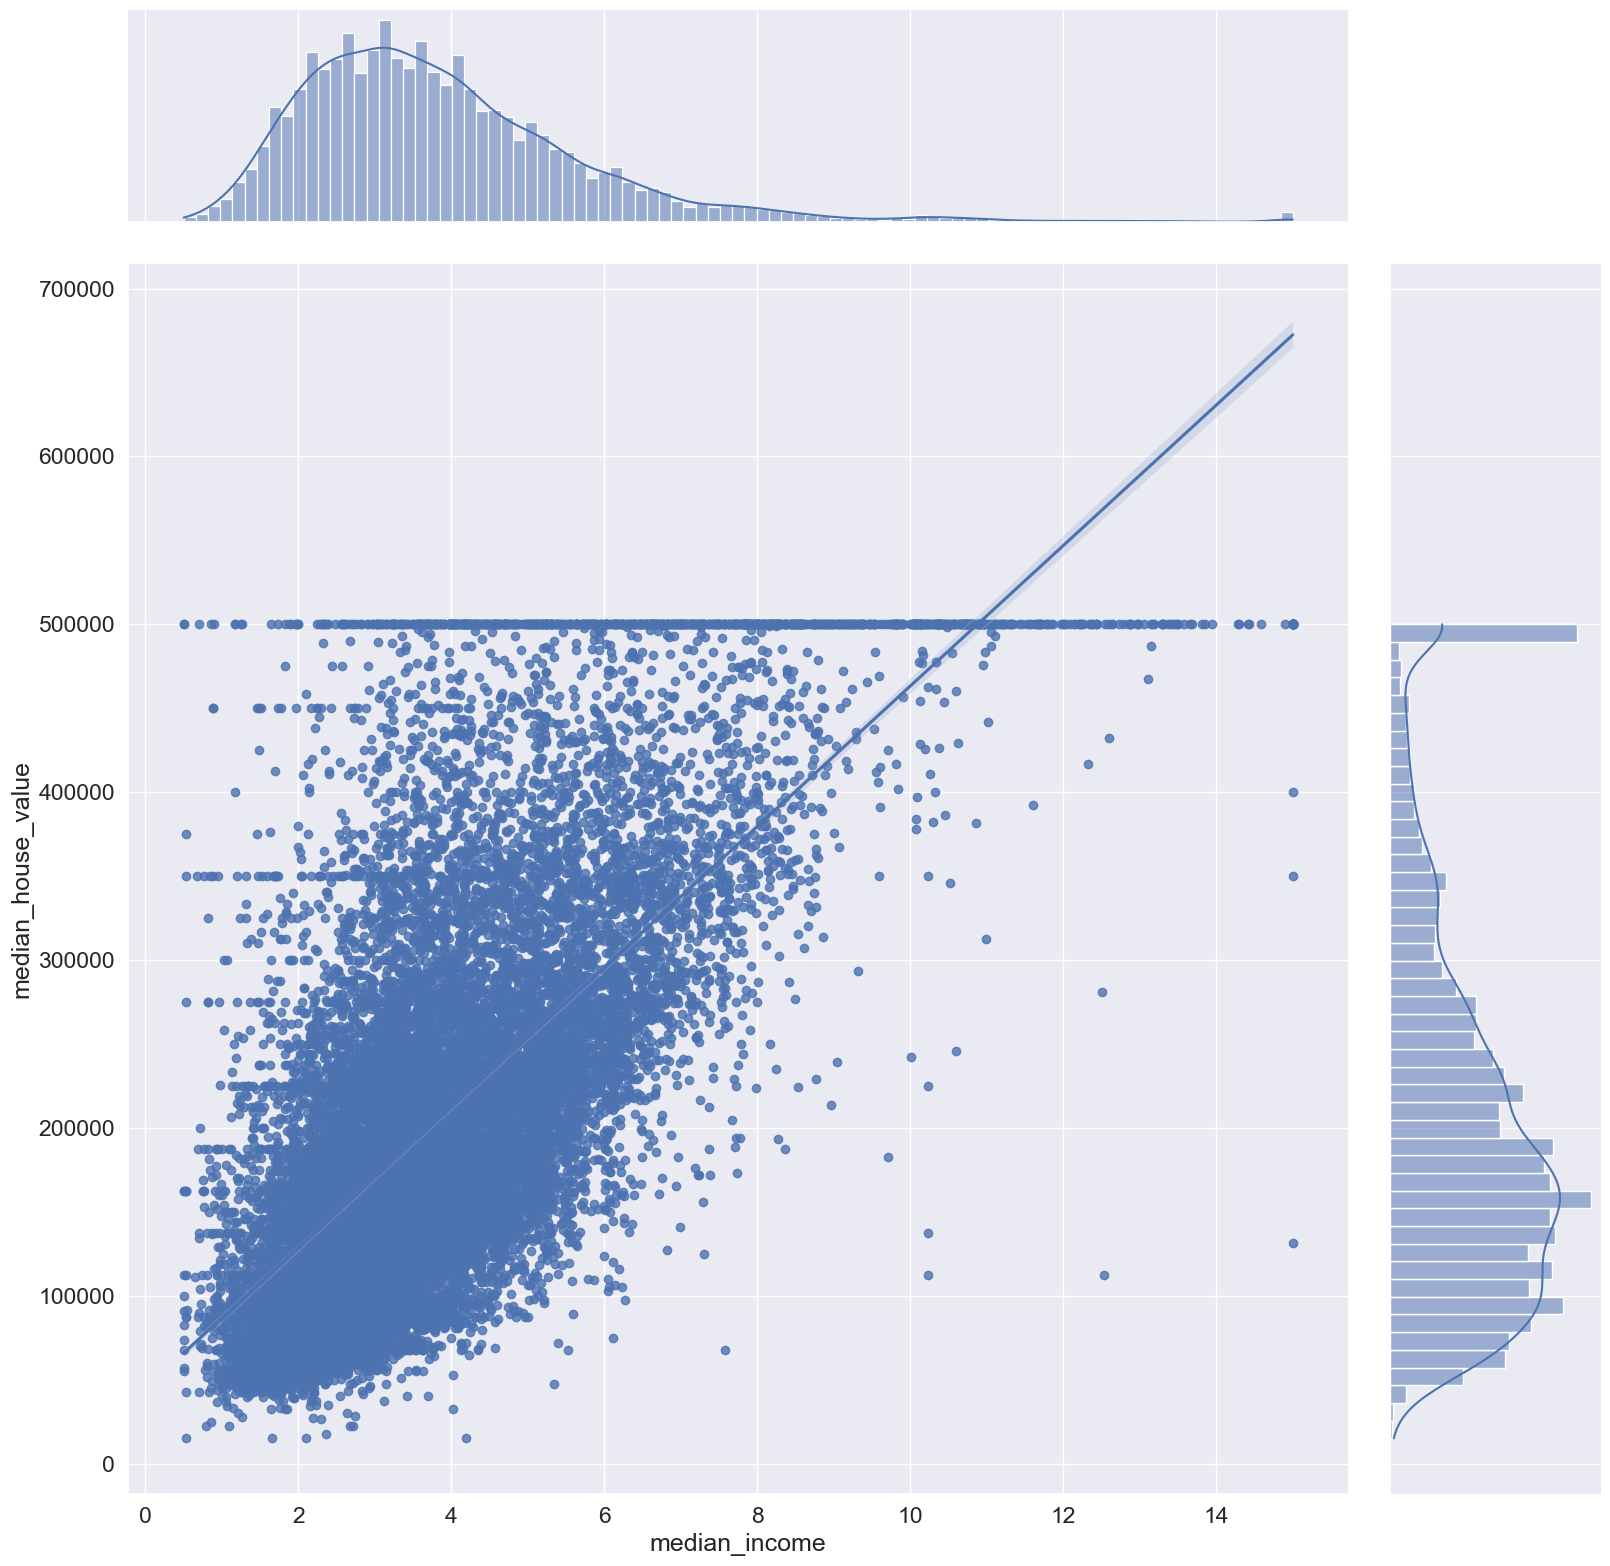

In [321]:
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = 'median_income', y = 'median_house_value', kind = 'reg', height = 16)
plt.show()

### Visualize the most inhabited areas with a scatter plot

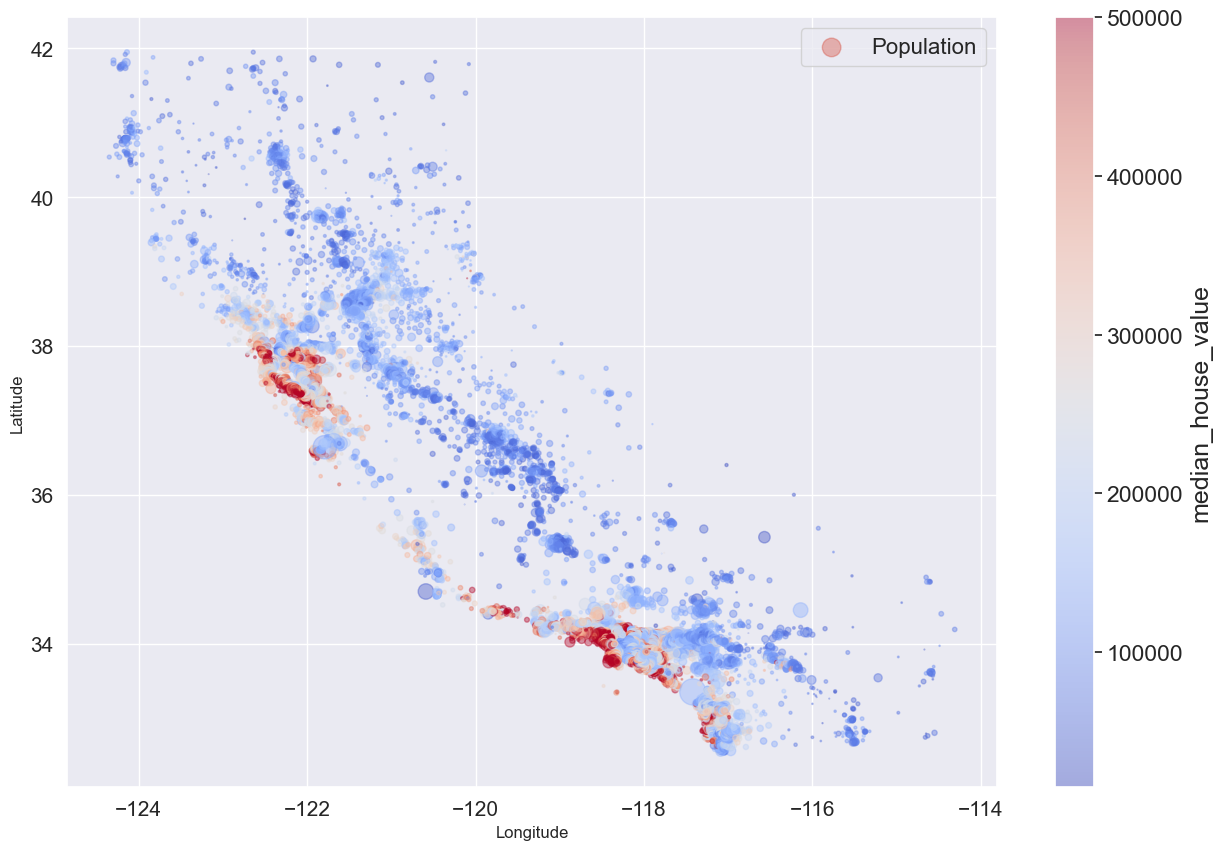

In [322]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude',
                       s = df.population/100, label = 'Population', figsize = (15, 10),
                       c = 'median_house_value', cmap = 'coolwarm',
                       colorbar = True, alpha = 0.4, fontsize = 15, sharex = False)
plt.ylabel('Latitude', fontsize = 12)
plt.xlabel('Longitude', fontsize = 12)
plt.legend(fontsize = 16)
plt.show()

### Bin the median income values to a new column

In [323]:
df['income_binning'] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 1], labels = ["Low", "Below_Average", "Above_Average", "High"])

In [324]:
df.income_binning.value_counts(normalize = True)

Low              0.250037
Above_Average    0.250037
Below_Average    0.249988
High             0.249939
Name: income_binning, dtype: float64

### Visualize the income binning column by grouping it with the ocean proximity column

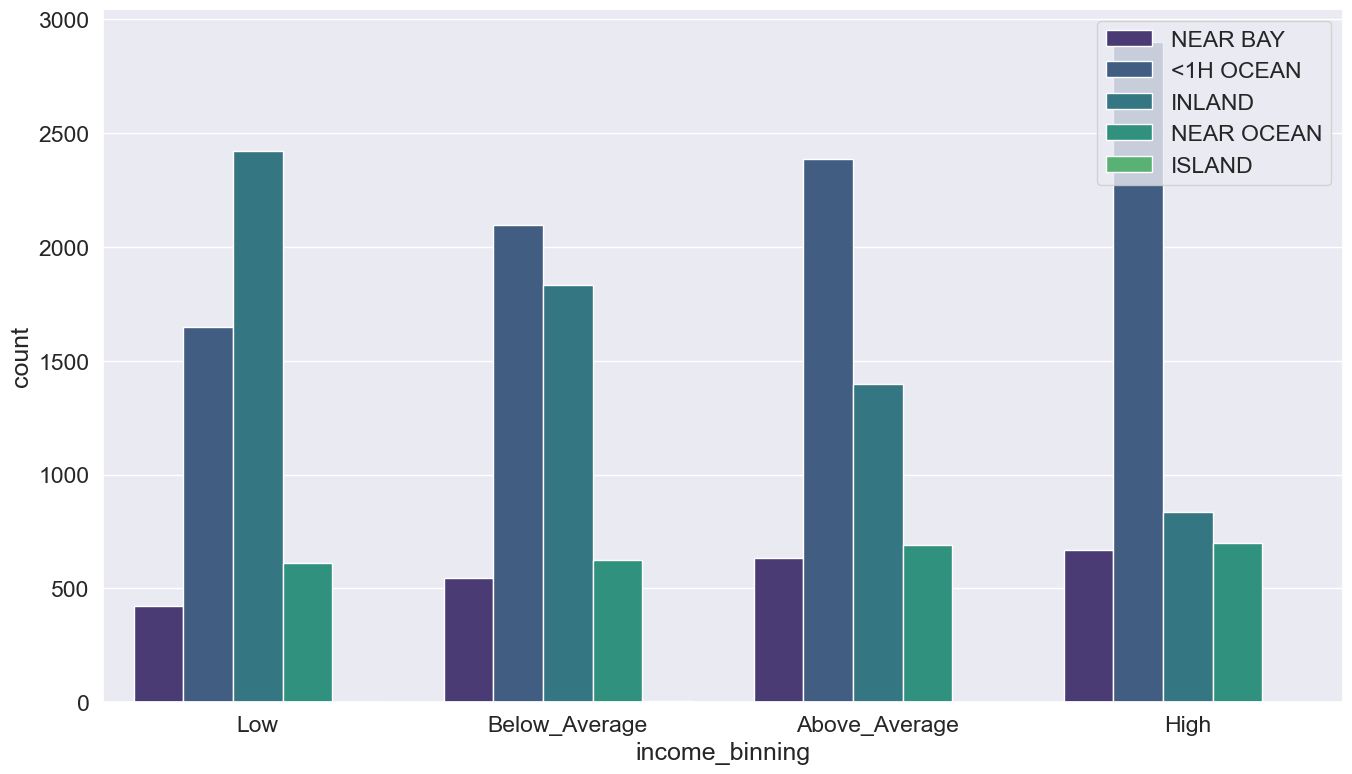

In [325]:
plt.figure(figsize = (16, 9))
sns.set(font_scale = 1.5, palette= 'viridis')
sns.countplot(data = df, x = 'income_binning', hue = 'ocean_proximity')
plt.legend(loc = 1)
plt.show()

### Visualize the income binning in comparison the the median house values

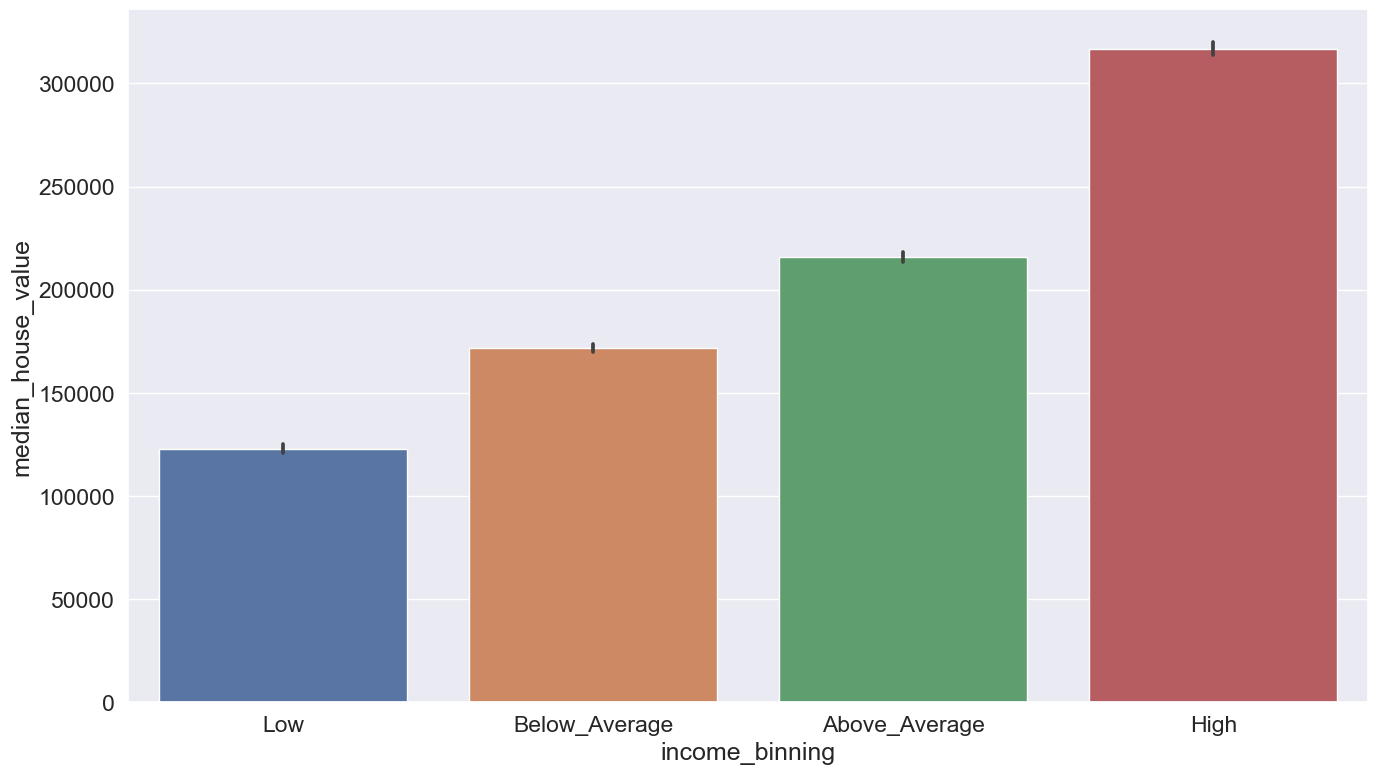

In [326]:
plt.figure(figsize = (16, 9))
sns.set(font_scale = 1.5)
sns.barplot(data = df, x = 'income_binning', y = 'median_house_value')
plt.show()

### Visualize the ocean_proximity in comparison the the median house values

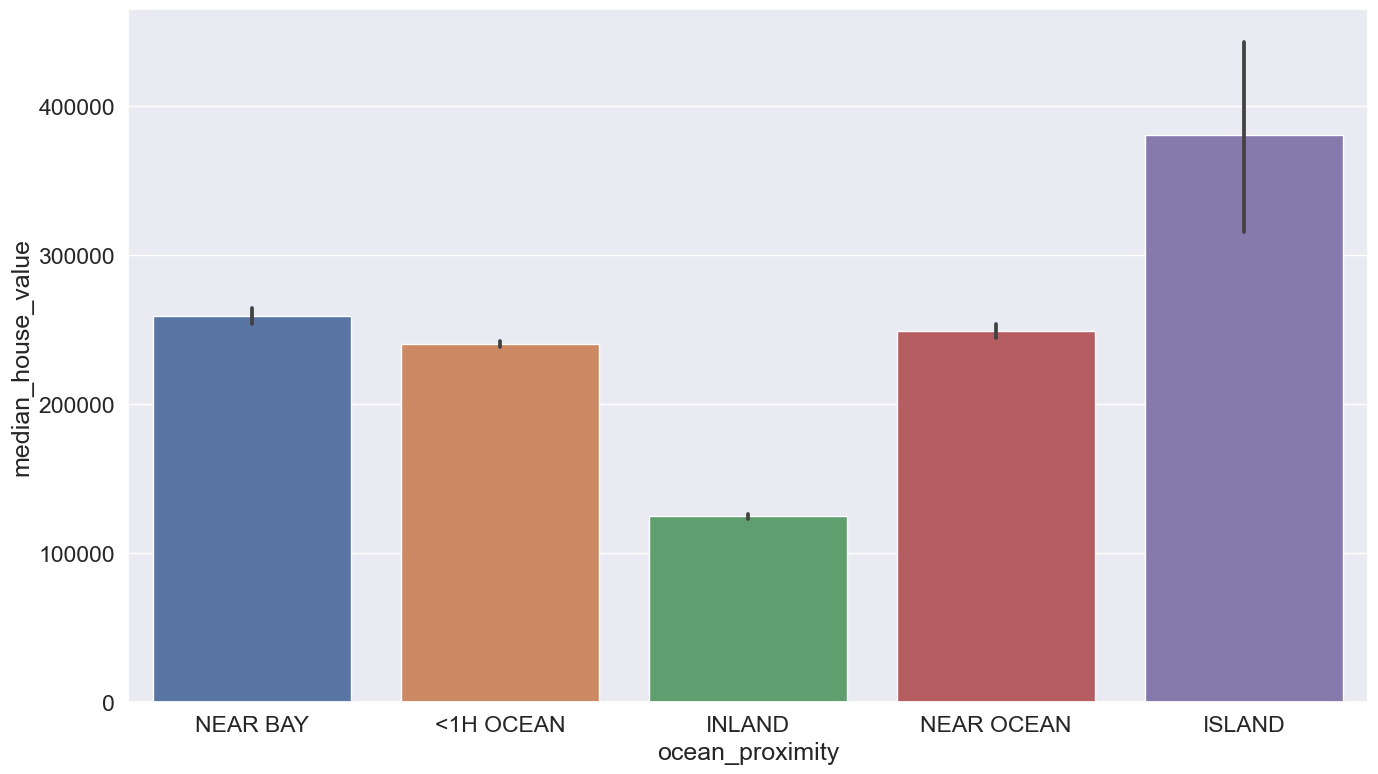

In [327]:
plt.figure(figsize=(16, 9))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = 'ocean_proximity', y = 'median_house_value')
plt.show()

### Save dataframe into a sqlite database

In [328]:
con = sq3.connect("housing_california.db")

In [329]:
df.to_sql("housing_california", con, index = False)

20433

In [330]:
con.execute("Select * FROM sqlite_master").fetchall()

[('table',
  'housing_california',
  'housing_california',
  2,
  'CREATE TABLE "housing_california" (\n"longitude" REAL,\n  "latitude" REAL,\n  "housing_median_age" REAL,\n  "total_rooms" REAL,\n  "total_bedrooms" REAL,\n  "population" REAL,\n  "households" REAL,\n  "median_income" REAL,\n  "median_house_value" REAL,\n  "ocean_proximity" TEXT,\n  "rooms_per_household" REAL,\n  "pop_per_household" REAL,\n  "bedrooms_per_room" REAL,\n  "income_binning" TEXT\n)')]

In [331]:
pd.read_sql("SELECT * FROM housing_california", con)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room,income_binning
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591,High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797,High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625,Low
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208,Low
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173,Low
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892,Low


In [332]:
con.close()